In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pattern_contrast.fibheap import FibonacciHeap as FibHeap
from pattern_contrast.peel_by_motif import *
from pattern_contrast.utils import *

import random
import pandas as pd
from datetime import datetime
import graph_tool.all as gt

In [2]:

plt.rcParams.update({'font.size': 14})

In [3]:
str2gt = {'000000000000000000000000000000800000000000000080': 1, '000000000000000000000000000000800000000000000040': 2, '0000000000000000000000000000000000000000000000c0': 0, '0000000000000000000000000000002000000000000000c0': 4, '000000000000004000000000000000800000000000000080': 5, '0000000000000020000000000000002000000000000000c0': 9, '0000000000000000000000000000008000000000000000c0': 3, '000000000000000000000000000000a000000000000000c0': 7, '000000000000004000000000000000a000000000000000c0': 11, '0000000000000040000000000000008000000000000000c0': 8, '0000000000000040000000000000002000000000000000c0': 10, '000000000000006000000000000000a000000000000000c0': 12, '000000000000004000000000000000200000000000000080': 6}
idx = 1

In [22]:
edge_dfs = []
neuron_dfs = []
for idx in range(1, 9):
    edge_dfs.append(pd.read_csv('Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-edges.csv', header=0, dtype={'Weight':'double'}))
    neuron_dfs.append(pd.read_csv('Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-neurons.csv'))

In [23]:
G = nx.from_pandas_edgelist(edge_dfs[0], 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', ['Weight'], create_using=nx.DiGraph())
index = 0
gt_node_map = {}
for n in G.nodes:
    gt_node_map[n] = index
    index += 1
g = gt.Graph()
for row in edge_dfs[0][['Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID']].values:
    g.add_edge(gt_node_map[row[0]], gt_node_map[row[1]])

In [24]:
start=datetime.now()
motif3 = gt.motifs(g, 3, return_maps=True)
print(datetime.now()-start)

0:00:00.130627


In [26]:
num_labeled_G = nx.relabel_nodes(G, gt_node_map)

In [ ]:
# su

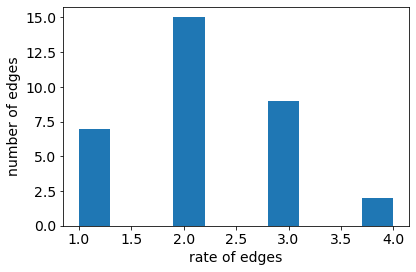

<ipython-input-46-468df4f466da>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


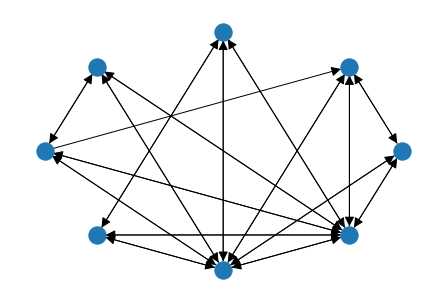

In [46]:
h_list = []
removed_nodes = []
pairs= [([list(i) for i in motif3[2][12]],1)]
for i in range(1):
#     print('!!', len(pairs[0][0]))
    node_d, fibheap = init_heap_and_dict(pairs)
    results = peel_by_motif(node_d, fibheap, pairs, 1, False)
    H = num_labeled_G.subgraph(results[1])
    removed_nodes += list(H.nodes)
    h_list.append(H)
    
    rates = nx.get_edge_attributes(H, "Weight")
    value_list = list(rates.values())
    vs = plt.hist(value_list)
    plt.ylabel('number of edges')
    plt.xlabel('rate of edges')
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_hist'+str(i)+'.png')
    plt.show()
    
    colors = ['g' if H[u][v]['Weight']>6 else 'r' for u,v in H.edges]
    nx.draw_shell(H, arrowsize=20)
    plt.tight_layout()
#     plt.savefig('figs/bitcoin_otc/contrast_9_10_shape'+str(i)+'.png')
    plt.show()
    
#     new_pairs = []
#     for pair in pairs:
#         temp_motif_list = []
# #         print(len(pair[0]))
#         for motif in pair[0]:
# #             print(motif)
#             flag = 0
#             for node in motif:
                
#                 if node in removed_nodes:
#                     flag = 1
#                     break
#             if flag == 0:
#                 temp_motif_list.append(motif)
#         new_pairs.append((temp_motif_list, pair[1]))
# #         print(len(temp_motif_list))
#     pairs = new_pairs

In [36]:
len(G.edges), len(G.nodes), len(G2.edges), len(G2.nodes)

(775, 186, 986, 193)

at time 1


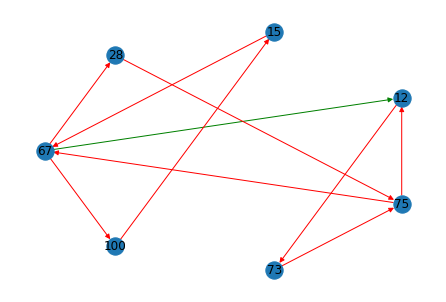

at time 2


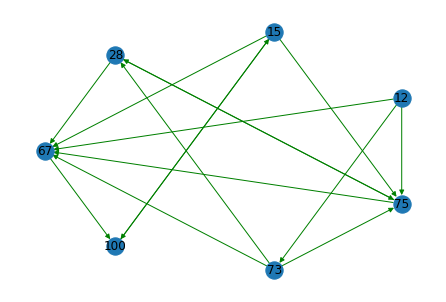

at time 3


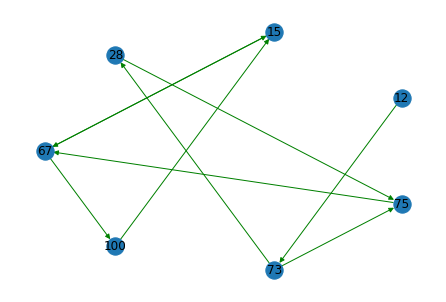

at time 4


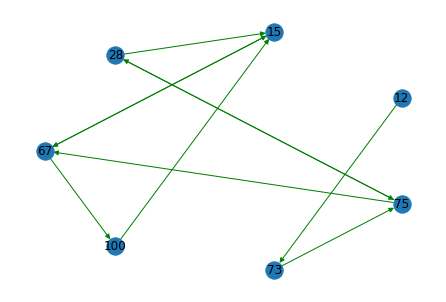

at time 5


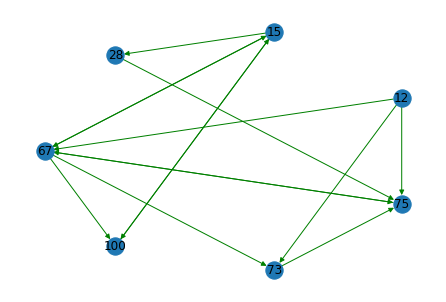

at time 6


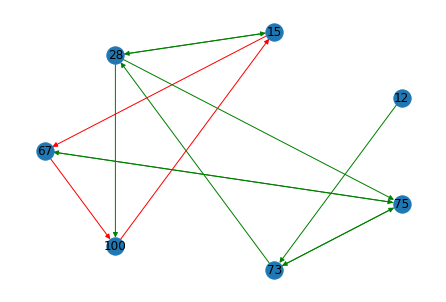

at time 7


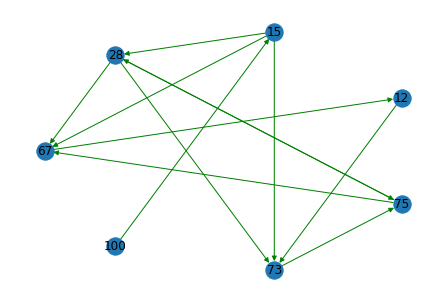

at time 8


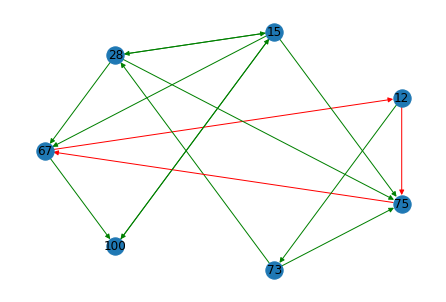

In [45]:
from networkx.algorithms import isomorphism

clock_tri = nx.DiGraph()
clock_tri.add_edges_from([(0,1),(1,2),(2,0)])

for i in range(8):
    G_temp = nx.from_pandas_edgelist(edge_dfs[i], 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', ['Weight'], create_using=nx.DiGraph())
    temp_subgraph = G_temp.subgraph(get_key(gt_node_map, removed_nodes))
    DiGM = isomorphism.DiGraphMatcher(temp_subgraph, clock_tri)
    it = DiGM.subgraph_isomorphisms_iter()
    cycls_3 = [list(dic.keys()) for dic in it]
    colors = []
    print('at time', i+1)
    for u,v in temp_subgraph.edges:
        flag = 0
        for clc3 in cycls_3:
            if u in clc3 and v in clc3:
                colors.append('r')
                flag = 1
                break
        if flag==0:
            colors.append('g')
    nx.draw_shell(temp_subgraph, edge_color=colors, with_labels=True)

    plt.show()
